<a href="https://colab.research.google.com/github/AndreYuli/Proyecto-Analisis-De-Datos/blob/main/Proyecto_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller de analisis de datos

Por Andrea Lopez y Billinwg Paternina

1.  Cargue el conjunto de datos en un notebook de Python, explórelos detectando cantidad de columnas, filas, tipos de datos.

#Proceso
Se instala la librería necesaria para la impotacion de los datos


In [ ]:
pip install pandas

##Carga del dataset
###Proceso
En esta parte se leen los datos desde un archivo en Google Sheets y se pasan a un DataFrame con pandas.  
También se muestra cuántas filas y columnas tiene, los tipos de datos, algunas filas de ejemplo y un resumen general de la tabla.  



In [ ]:
import pandas as pd

google_sheet_url = 'https://docs.google.com/spreadsheets/d/1uCraJKJQ2nTyW-CYpNgfFDu-n5ilDBhQe8-3PGaFR8U/export?format=csv'
df = pd.read_csv(google_sheet_url, sep=',')

print("Cantidad de filas y columnas:")
print(df.shape)

print("\nTipos de datos:")
print(df.dtypes)

print("\nPrimeras filas:")
print(df.head())

print("\nInformación del DataFrame:")
print(df.info())

Cantidad de filas y columnas:
(9994, 10)

Tipos de datos:
Order ID         object
Category         object
Sub Category     object
City             object
Order Date       object
Region           object
Sales             int64
Discount        float64
Profit          float64
State,           object
dtype: object

Primeras filas:
  Order ID          Category      Sub Category         City  Order Date  \
0      OD1      Oil & Masala           Masalas      Vellore   11/8/2017   
1      OD2         Beverages     Health Drinks  Krishnagiri   11/8/2017   
2      OD3       Food Grains      Atta & Flour   Perambalur   6/12/2017   
3      OD4  Fruits & Veggies  Fresh Vegetables   Dharmapuri  10/11/2016   
4      OD5       Food Grains   Organic Staples         Ooty  10/11/2016   

  Region  Sales  Discount  Profit       State,  
0  North   1254      0.12  401.28  Tamil Nadu,  
1  South    749      0.18  149.80  Tamil Nadu,  
2   West   2360      0.21  165.20  Tamil Nadu,  
3  South    896      0.2

2. Realice las transformaciones necesarias para dejar todas las columnas con su formato y tipo de dato
adecuado, entre descriptivas, columnas tipo fecha, columnas enteras.

##Limpieza y transformación de columnas
###Proceso:
Aquí se corrige el nombre de la columna "State" que tenía una coma de más.  
Después se cambia la columna de fecha al formato de fecha de pandas y se ponen varias columnas como categóricas para que el DataFrame quede más ordenado y fácil de manejar.  



In [ ]:
df.rename(columns={'State,': 'State'}, inplace=True)
print(df.columns)

df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%Y')
df['Category'] = df['Category'].astype('category')
df['Sub Category'] = df['Sub Category'].astype('category')
df['City'] = df['City'].astype('category')
df['Region'] = df['Region'].astype('category')
df['State'] = df['State'].astype('category')

print("Info")
print(df.info)
print(df.dtypes)




Index(['Order ID', 'Category', 'Sub Category', 'City', 'Order Date', 'Region',
       'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')
Info
<bound method DataFrame.info of      Order ID           Category      Sub Category         City Order Date  \
0         OD1       Oil & Masala           Masalas      Vellore 2017-11-08   
1         OD2          Beverages     Health Drinks  Krishnagiri 2017-11-08   
2         OD3        Food Grains      Atta & Flour   Perambalur 2017-06-12   
3         OD4   Fruits & Veggies  Fresh Vegetables   Dharmapuri 2016-10-11   
4         OD5        Food Grains   Organic Staples         Ooty 2016-10-11   
...       ...                ...               ...          ...        ...   
9989   OD9990  Eggs, Meat & Fish              Eggs      Madurai 2015-12-24   
9990   OD9991             Bakery          Biscuits  Kanyakumari 2015-07-12   
9991   OD9992        Food Grains              Rice         Bodi 2017-06-06   
9992   OD9993       Oil & Masala  

3. Explorar los datasets entregados buscando datos faltantes, información inconsistente y establezca una
estrategia de tratamiento para dichas columnas. Estas celdas deben ir documentadas con el argumento de la
decisión tomada, si no se documenta, no cuenta como solución.

##Exploración inicial de los datos
###Proceso  
En esta parte se revisa si hay valores nulos, se sacan estadísticas básicas de las columnas numéricas y se ve cuántos valores tiene cada categoría.  
Esto ayuda a conocer mejor los datos antes de analizarlos más a fondo.


In [ ]:
# Verificar valores faltantes: Se usa isnull().sum() para contar la cantidad de valores nulos en cada columna.
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Obtener estadísticas descriptivas para columnas numéricas: Se usa describe() para obtener un resumen estadístico de las columnas numéricas, ayudando a identificar rangos, valores atípicos y distribuciones.
print("\nEstadísticas descriptivas para columnas numéricas:")
display(df.describe())

# Verificar el recuento de valores para columnas categóricas: Se usa value_counts() para ver la distribución de los valores únicos en las columnas categóricas, permitiendo detectar inconsistencias o variaciones inesperadas en las entradas.
print("\nRecuento de valores para columnas categóricas:")
print("Categoría:")
print(df['Category'].value_counts())
print("\nSub Categoría:")
print(df['Sub Category'].value_counts())
print("\nCiudad:")
print(df['City'].value_counts())
print("\nRegión:")
print(df['Region'].value_counts())
print("\nEstado:")
print(df['State'].value_counts())

Valores faltantes por columna:
Order ID        0
Category        0
Sub Category    0
City            0
Order Date      0
Region          0
Sales           0
Discount        0
Profit          0
State           0
Order Year      0
Order Month     0
dtype: int64

Estadísticas descriptivas para columnas numéricas:


,Order Date,Sales,Discount,Profit,Order Year,Order Month
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2017-04-30 05:17:08.056834048,1496.596158,0.226817,374.937082,2016.722233,7.809686
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000,2015.000000,1.000000
25%,2016-05-23 00:00:00,1000.000000,0.160000,180.022500,2016.000000,5.000000
50%,2017-06-26 00:00:00,1498.000000,0.230000,320.780000,2017.000000,9.000000
75%,2018-05-14 00:00:00,1994.750000,0.290000,525.627500,2018.000000,11.000000
max,2018-12-30 00:00:00,2500.000000,0.350000,1120.950000,2018.000000,12.000000
std,NaN,577.559036,0.074636,239.932881,1.123555,3.284654



Recuento de valores para columnas categóricas:
Categoría:
Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

Sub Categoría:
Sub Category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Chicken               348
Organic Fruits        348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64

Ciudad:
City
Kanyakumari       459
Tirunelveli       446
Bodi         

4. Realice un análisis exploratorio visual usando de las columnas con alguna de las librerías y estrategias
trabajadas, separando entre columnas numéricas, descriptivas, tipo fecha. Recuerde que para cada tipo hay
un grafico adecuado para su análisis. Determine conclusiones y documente las celdas creadas, no cuenta el
punto si no documenta.

## Visualización

### Proceso:

Importar las librerias necesarias(e.g., matplotlib, seaborn)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Visualización datos numéricas
### Proceso:
Se crean  visualizaciones adecuadas para las columnas numéricas ('Sales', 'Discount', 'Profit'), como histogramas y diagramas de caja, para comprender su distribución e identificar valores atípicos.


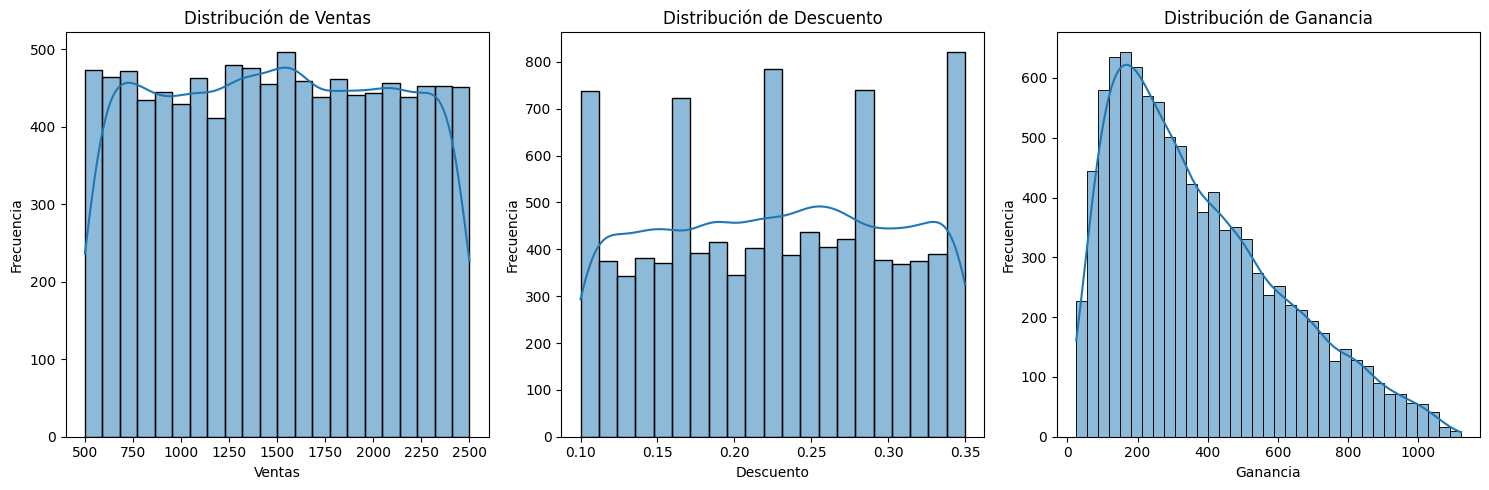

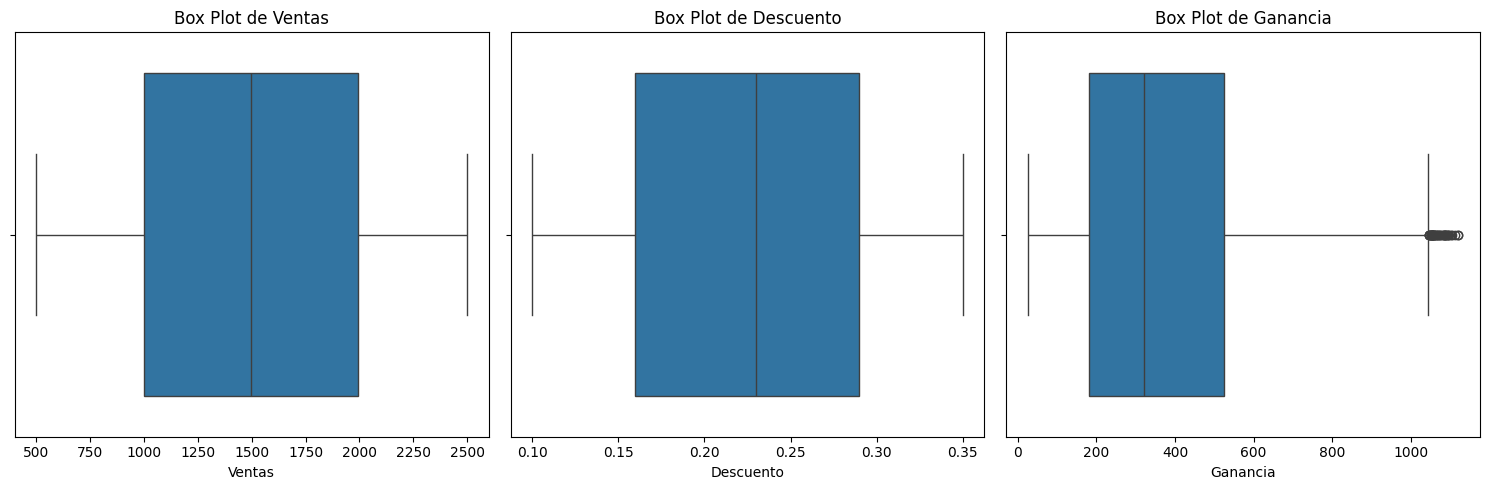

In [ ]:
# Crear histogramas para las columnas numéricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.histplot(df['Discount'], kde=True)
plt.title('Distribución de Descuento')
plt.xlabel('Descuento')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
sns.histplot(df['Profit'], kde=True)
plt.title('Distribución de Ganancia')
plt.xlabel('Ganancia')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Crear box plots para las columnas numéricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Sales'])
plt.title('Box Plot de Ventas')
plt.xlabel('Ventas')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Discount'])
plt.title('Box Plot de Descuento')
plt.xlabel('Descuento')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Profit'])
plt.title('Box Plot de Ganancia')
plt.xlabel('Ganancia')

plt.tight_layout()
plt.show()

**Análisis Exploratorio Visual de Columnas Numéricas**

**Ventas (Sales):**
*   **Histograma:** La distribución de las Ventas parece ser relativamente uniforme (casi plana), con picos ligeros alrededor de 750, 1250, 1750 y 2250. Esto sugiere que las ventas se distribuyen de manera bastante equitativa en todo el rango de valores.
*   **Box Plot:** El box plot muestra una distribución simétrica con una mediana cerca del centro de la caja. Hay algunos puntos que podrían considerarse valores atípicos (outliers) en los extremos superiores e inferiores, aunque la distribución general es bastante compacta dentro del rango esperado.

**Descuento (Discount):**
*   **Histograma:** La distribución del Descuento muestra picos notables en valores específicos (aproximadamente 0.1, 0.16, 0.23, 0.29, y 0.35). Esto indica que los descuentos se aplican en niveles discretos y predefinidos, no de forma continua.
*   **Box Plot:** El box plot del Descuento muestra una distribución simétrica con la mediana en el centro de la caja. Similar a las Ventas, hay algunos valores que podrían considerarse atípicos en los extremos, pero la mayoría de los datos se concentran dentro de la caja.

**Ganancia (Profit):**
*   **Histograma:** La distribución de la Ganancia está claramente sesgada hacia la derecha. La mayoría de las transacciones generan ganancias más bajas, con una cola larga hacia ganancias más altas. Esto sugiere que las ganancias más altas son menos frecuentes.
*   **Box Plot:** El box plot de la Ganancia muestra una distribución asimétrica, con la mediana desplazada hacia la izquierda de la caja. Hay varios puntos individuales por encima del bigote superior, lo que indica la presencia de valores atípicos (outliers) que representan transacciones con ganancias significativamente mayores.

## Visualizar datos categóricos

### Proceso:
Se crea visualizaciones adecuadas para las columnas categóricas ('Category', 'Sub Category', 'City', 'Region', 'State') como gráficos de barras y de conteo, para ver la distribución de las categorías.


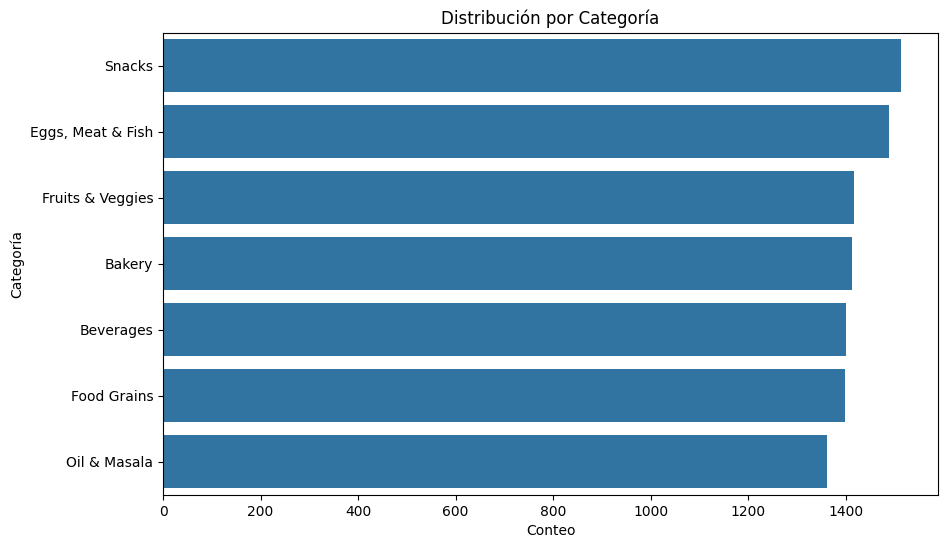

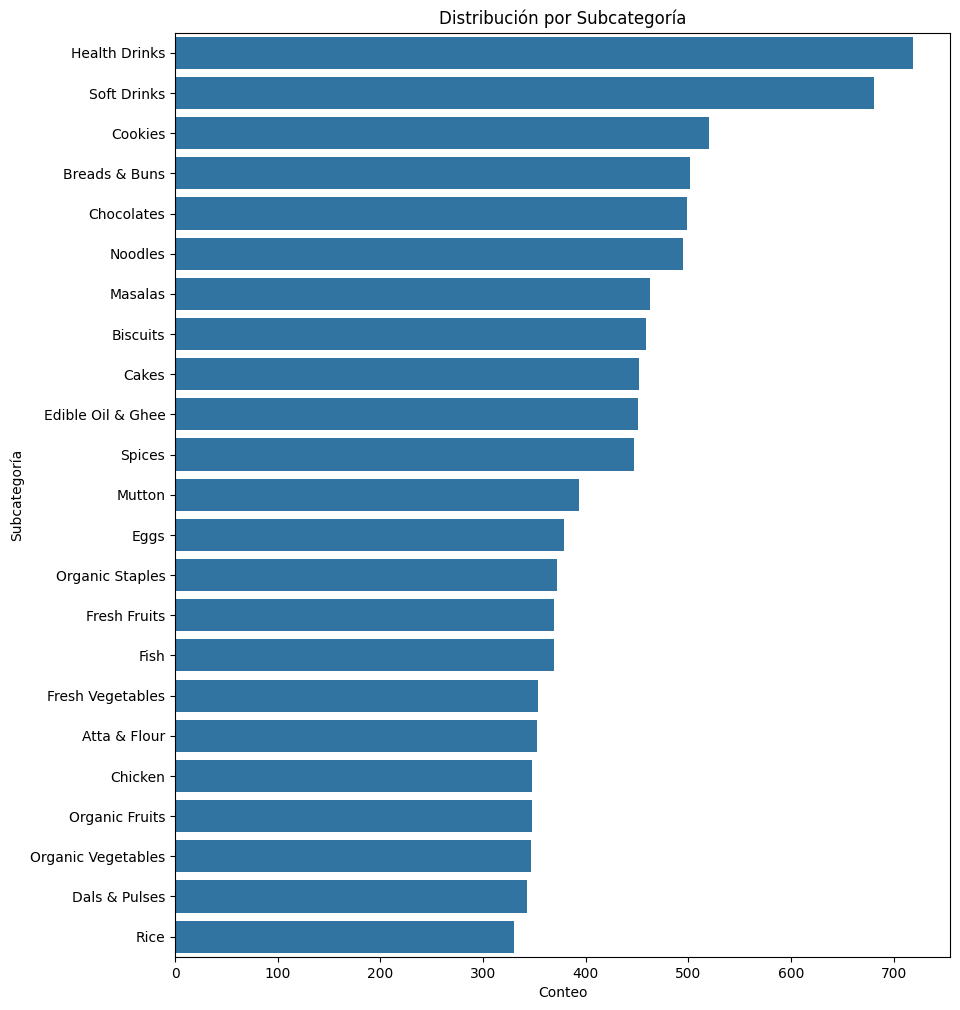

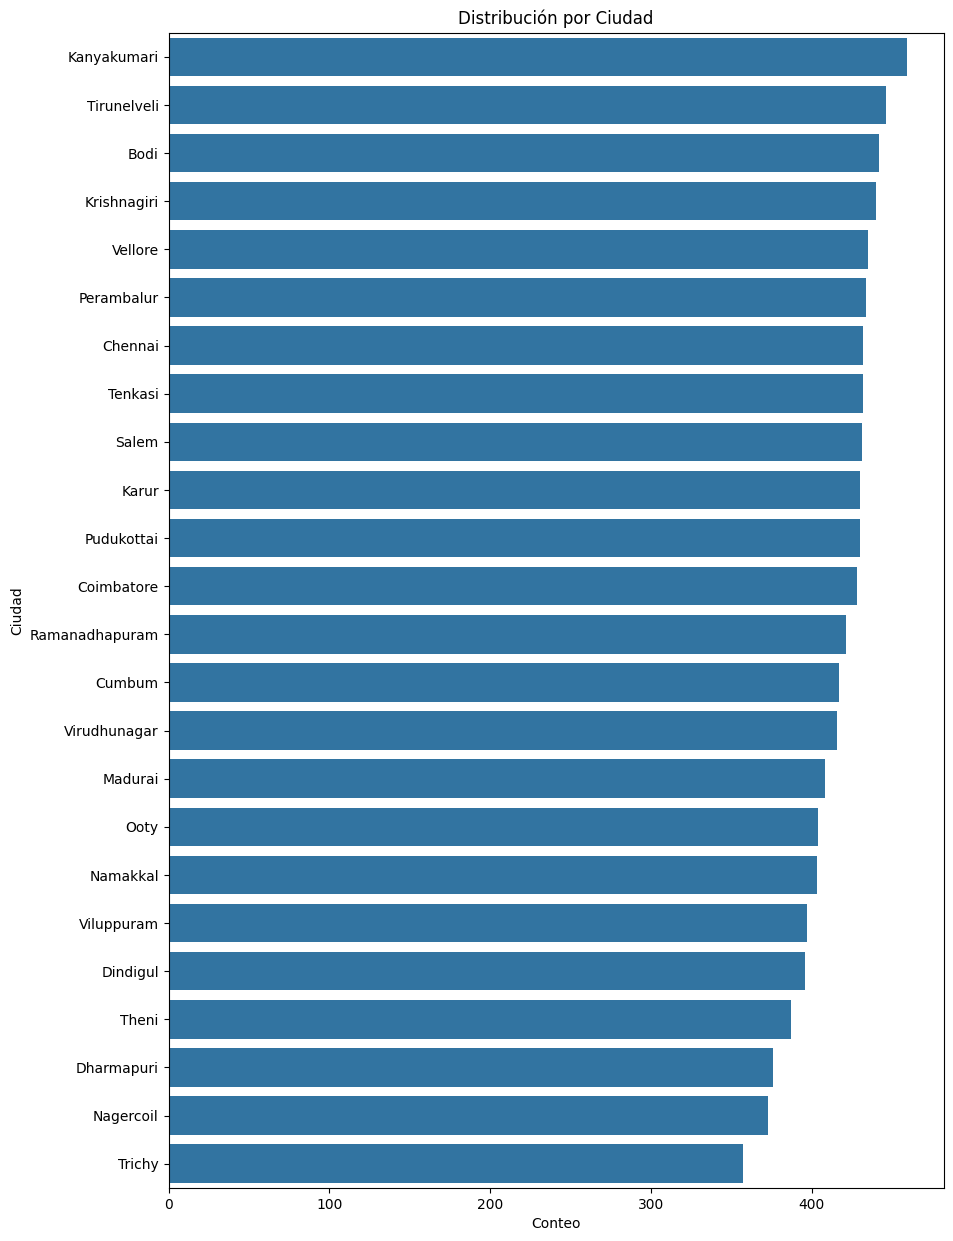

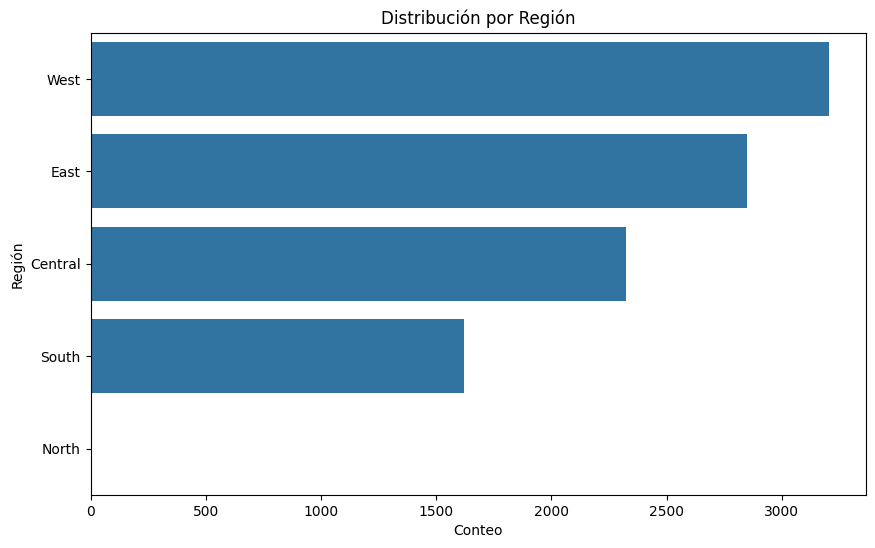

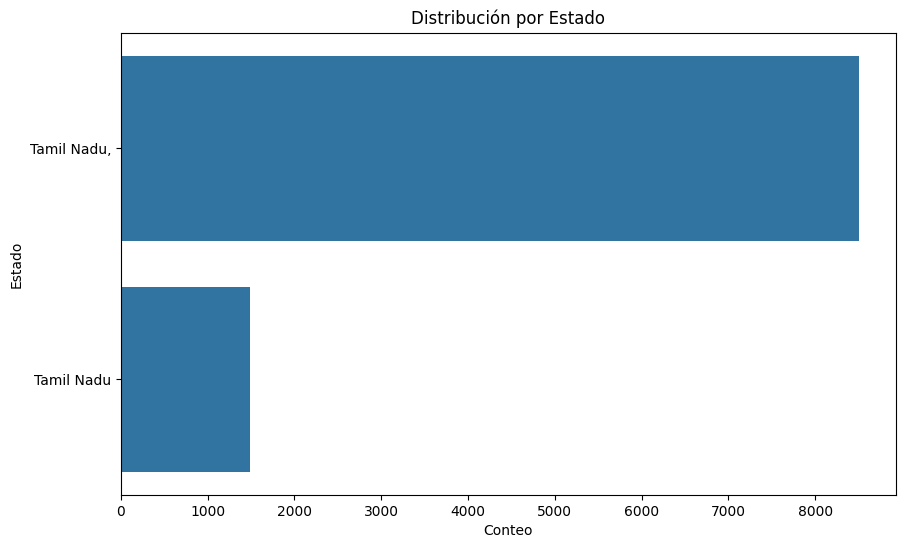

In [ ]:
# Visualización de columnas categóricas

# Columna: Category
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order = df['Category'].value_counts().index)
plt.title('Distribución por Categoría')
plt.xlabel('Conteo')
plt.ylabel('Categoría')
plt.show()

# Columna: Sub Category
plt.figure(figsize=(10, 12))
sns.countplot(y='Sub Category', data=df, order = df['Sub Category'].value_counts().index)
plt.title('Distribución por Subcategoría')
plt.xlabel('Conteo')
plt.ylabel('Subcategoría')
plt.show()

# Columna: City
plt.figure(figsize=(10, 15))
sns.countplot(y='City', data=df, order = df['City'].value_counts().index)
plt.title('Distribución por Ciudad')
plt.xlabel('Conteo')
plt.ylabel('Ciudad')
plt.show()

# Columna: Region
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=df, order = df['Region'].value_counts().index)
plt.title('Distribución por Región')
plt.xlabel('Conteo')
plt.ylabel('Región')
plt.show()

# Columna: State
plt.figure(figsize=(10, 6))
sns.countplot(y='State', data=df, order = df['State'].value_counts().index)
plt.title('Distribución por Estado')
plt.xlabel('Conteo')
plt.ylabel('Estado')
plt.show()

**Análisis de las visualizaciones de columnas categóricas**

**Observaciones de los gráficos de conteo:**
- **Category:** Las categorías "Snacks" y "Eggs, Meat & Fish" son las más frecuentes, mientras que las otras categorías tienen una distribución relativamente uniforme.
- **Sub Category:** Existe una gran variedad de subcategorías. "Health Drinks" y "Soft Drinks" son las subcategorías más comunes, lo que sugiere una alta demanda de estas bebidas. La distribución de las demás subcategorías es más dispersa.
- **City:** La distribución por ciudad muestra que Kanyakumari, Tirunelveli y Bodi son las ciudades con mayor número de pedidos. Hay una variación considerable en el número de pedidos entre las diferentes ciudades.
- **Region:** La región "West" es la que tiene la mayor cantidad de pedidos, seguida por "East" y "Central". La región "South" tiene menos pedidos, y la región "North" tiene un número muy bajo de pedidos (posiblemente un error o un dato atípico a investigar).
- **State:** Casi todos los pedidos provienen de "Tamil Nadu,". Hay una pequeña cantidad de pedidos de "Tamil Nadu". Es importante investigar la inconsistencia en el nombre del estado ("Tamil Nadu," vs "Tamil Nadu") y considerar unificarlo si se trata del mismo estado.

## Visualizador datos por fecha

### Proceso:
Se anliza la columna 'Order Date' extrayendo características temporales (p. ej., año, mes) y crean visualizaciones como gráficos de series temporales para observar las tendencias a lo largo del tiempo.

In [ ]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

print(df[['Order Date', 'Order Year', 'Order Month']].head())

  Order Date  Order Year  Order Month
0 2017-11-08        2017           11
1 2017-11-08        2017           11
2 2017-06-12        2017            6
3 2016-10-11        2016           10
4 2016-10-11        2016           10


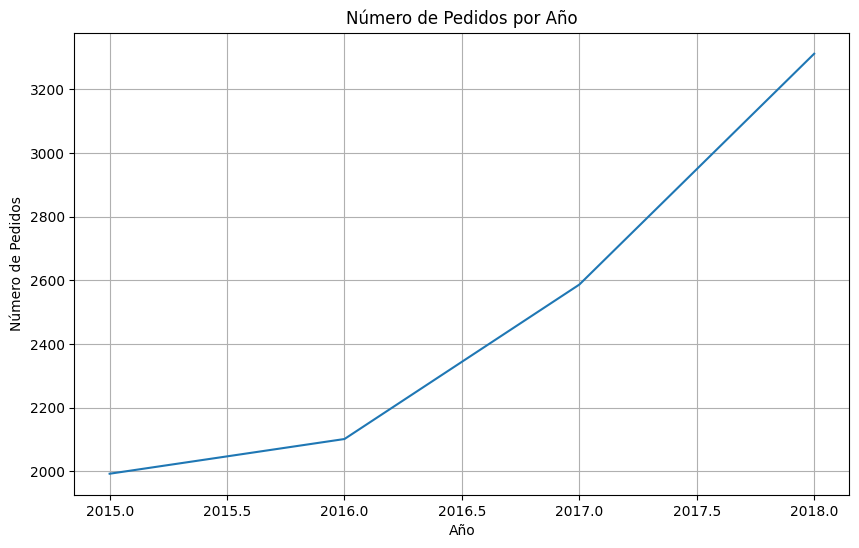

In [ ]:
orders_per_year = df['Order Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=orders_per_year.index, y=orders_per_year.values)
plt.title('Número de Pedidos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

**Reasoning**:
Create a time series plot showing the number of orders per month, considering all years combined.



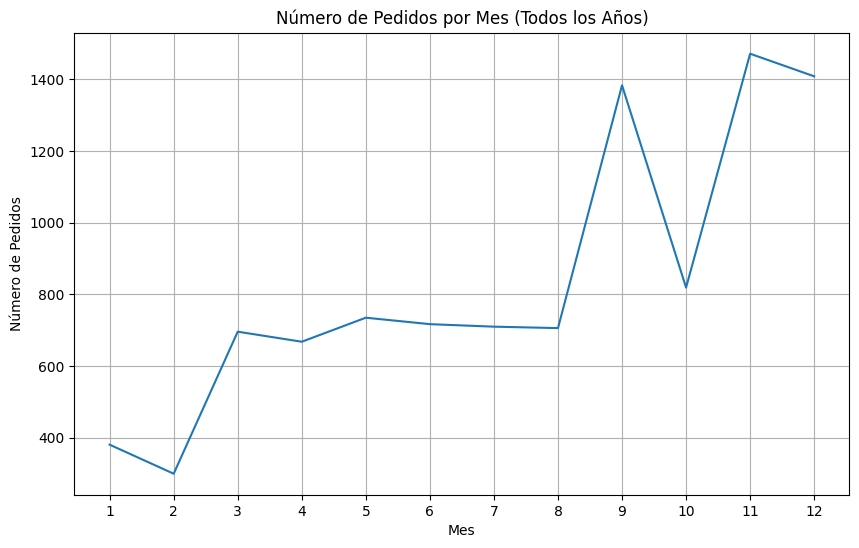

In [ ]:
orders_per_month = df['Order Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=orders_per_month.index, y=orders_per_month.values)
plt.title('Número de Pedidos por Mes (Todos los Años)')
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**Análisis de las visualizaciones de la columna 'Order Date'**

**Gráfico de Número de Pedidos por Año:**

Observamos una clara tendencia al alza en el número de pedidos a lo largo de los años, desde 2015 hasta 2018. Esto indica un crecimiento constante en las ventas o la actividad de pedidos en el período analizado.

**Gráfico de Número de Pedidos por Mes (Todos los Años):**

El gráfico mensual muestra una estacionalidad notable. Los meses con mayor número de pedidos son septiembre, noviembre y diciembre. Por el contrario, febrero tiene el menor número de pedidos. Esto podría estar relacionado con patrones de consumo estacionales, promociones o eventos específicos en esos meses.

5. Elija dos columnas descriptivas del conjunto de datos entregado, y cree dos dataframes nuevos compuestos
por la descripción de la columna y cree una columna código o autonumérico asociado a dicha descripción.
Luego reemplace dicha descripción en el dataset principal, con el código generado. De esta manera, las 3 tablas
quedarán relacionadas, con una tabla principal y dos tablas maestras.

##Creación de códigos para categorías y regiones
###Proceso
En esta parte se crean dos tablas nuevas: una con las categorías y otra con las regiones, cada una con un número único como código.  
Después, esos códigos se unen al DataFrame principal para reemplazar los nombres originales de categoría y región.  
Al final se muestra cómo queda el DataFrame con esos códigos en lugar de los textos.  

In [ ]:
# Crear un nuevo dataframe para 'Category' con un código único
df_category = df[['Category']].drop_duplicates().reset_index(drop=True)
df_category['Category_Code'] = df_category.index + 1
print("DataFrame de Categoría con Código:")
display(df_category)

# Crear un nuevo dataframe para 'Region' con un código único
df_region = df[['Region']].drop_duplicates().reset_index(drop=True)
df_region['Region_Code'] = df_region.index + 1
print("\nDataFrame de Región con Código:")
display(df_region)

# Reemplazar las columnas originales 'Category' y 'Region' con sus códigos en el dataframe principal
df = df.merge(df_category, on='Category', how='left')
df = df.merge(df_region, on='Region', how='left')

df.drop(['Category', 'Region'], axis=1, inplace=True)

print("\nDataFrame principal con códigos:")
display(df.head())

DataFrame de Categoría con Código:


,Category,Category_Code
0,Oil & Masala,1
1,Beverages,2
2,Food Grains,3
3,Fruits & Veggies,4
4,Bakery,5
5,Snacks,6
6,"Eggs, Meat & Fish",7



DataFrame de Región con Código:


,Region,Region_Code
0,North,1
1,South,2
2,West,3
3,Central,4
4,East,5



DataFrame principal con códigos:


,Order ID,Sub Category,City,Order Date,Sales,Discount,Profit,State,Order Year,Order Month,Category_Code,Region_Code
0,OD1,Masalas,Vellore,2017-11-08,1254,0.12,401.28,"Tamil Nadu,",2017,11,1,1
1,OD2,Health Drinks,Krishnagiri,2017-11-08,749,0.18,149.80,"Tamil Nadu,",2017,11,2,2
2,OD3,Atta & Flour,Perambalur,2017-06-12,2360,0.21,165.20,"Tamil Nadu,",2017,6,3,3
3,OD4,Fresh Vegetables,Dharmapuri,2016-10-11,896,0.25,89.60,"Tamil Nadu,",2016,10,4,2
4,OD5,Organic Staples,Ooty,2016-10-11,2355,0.26,918.45,"Tamil Nadu,",2016,10,3,2


6. Guarde las 3 tablas en una base de datos Mysql. Para esto deben trabajar los notebooks en local, usando
VSC. Pueden usar la base de datos que hemos trabajado con Mysql workbench.

##Instalar librería MySQL
###Proceso
Para guardar las tablas en una base de datos MySQL, primero necesitamos instalar la librería `mysql.connector`.

In [ ]:
pip install mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp312-cp312-linux_x86_64.whl size=247950 sha256=051fd2acf5de7dd6546ca94a27b42335e08555ec1f2352d2b939302cb2511399
  Stored in directory: /root/.cache/pip/wheels/03/17/fa/d7604c72dd3dd6d3eb3d249abf36cc532c9a9b4354b8f1bc4f
Successfully built mysql.connector


##Conexión y carga de datos a MySQL
###Proceso
Luego, podemos usar la librería para conectarnos a la base de datos y escribir los DataFrames en tablas. Asegúrate de tener un servidor MySQL corriendo localmente y reemplaza los valores de `user`, `password`, `host`, y `database` con los tuyos.

In [ ]:
import mysql.connector
from mysql.connector import Error

try:
    # Establecer la conexión a la base de datos MySQL
    conn = mysql.connector.connect(
        host='localhost',    # Reemplaza con la dirección de tu servidor MySQL
        database='parcialdb',
        user='root',
        password='0123456789'
    )

    if conn.is_connected():
        cursor = conn.cursor()

        def save_dataframe_to_mysql(dataframe, table_name, cursor, connection):
            cursor.execute(f"DROP TABLE IF EXISTS {table_name}")

            if table_name == 'fact_df':
                 create_table_query = f"""
                 CREATE TABLE {table_name} (
                     `Order ID` VARCHAR(255),
                     `Sub Category` VARCHAR(255),
                     `City` VARCHAR(255),
                     `Order Date` DATE,
                     `Sales` INT,
                     `Discount` FLOAT,
                     `Profit` FLOAT,
                     `State` VARCHAR(255),
                     `Order Year` INT,
                     `Order Month` INT,
                     `Category_Code` INT,
                     `Region_Code` INT
                 );
                 """
            elif table_name == 'dim_category':
                 create_table_query = f"""
                 CREATE TABLE {table_name} (
                     `Category` VARCHAR(255),
                     `Category_Code` INT
                 );
                 """
            elif table_name == 'dim_region':
                 create_table_query = f"""
                 CREATE TABLE {table_name} (
                     `Region` VARCHAR(255),
                     `Region_Code` INT
                 );
                 """
            else:
                print(f"Tabla {table_name} no reconocida.")
                return


            cursor.execute(create_table_query)
            print(f"Tabla '{table_name}' creada exitosamente.")

            if table_name == 'fact_df':
                insert_sql = f"""
                INSERT INTO {table_name} (`Order ID`, `Sub Category`, `City`, `Order Date`, `Sales`, `Discount`, `Profit`, `State`, `Order Year`, `Order Month`, `Category_Code`, `Region_Code`)
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                """
                data_to_insert = [tuple(row) for row in dataframe[['Order ID', 'Sub Category', 'City', 'Order Date', 'Sales', 'Discount', 'Profit', 'State', 'Order Year', 'Order Month', 'Category_Code', 'Region_Code']].values]

            elif table_name == 'dim_category':
                 insert_sql = f"""
                 INSERT INTO {table_name} (`Category`, `Category_Code`)
                 VALUES (%s, %s)
                 """
                 data_to_insert = [tuple(row) for row in dataframe[['Category', 'Category_Code']].values]

            elif table_name == 'dim_region':
                 insert_sql = f"""
                 INSERT INTO {table_name} (`Region`, `Region_Code`)
                 VALUES (%s, %s)
                 """
                 data_to_insert = [tuple(row) for row in dataframe[['Region', 'Region_Code']].values]
            else:
                 return


            cursor.executemany(insert_sql, data_to_insert)
            connection.commit()
            print(f"Datos insertados en la tabla '{table_name}' exitosamente.")

        save_dataframe_to_mysql(df, 'fact_df', cursor, conn)
        save_dataframe_to_mysql(df_category, 'dim_category', cursor, conn)
        save_dataframe_to_mysql(df_region, 'dim_region', cursor, conn)


except Error as e:
    print(f"Error al conectar a MySQL o al guardar datos: {e}")

finally:
    # Cerrar la conexión
    if conn is not None and conn.is_connected():
        cursor.close()
        conn.close()
        print("Conexión a MySQL cerrada.")